# PRAKTIKUM 2
### 1 - Ilustrasi Data Non-Linier
### 1a - Import Library

In [7]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### 1b - Buat Kembali Fungsi Plotting

In [8]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1c - Buat Data Dummy Non-Linier

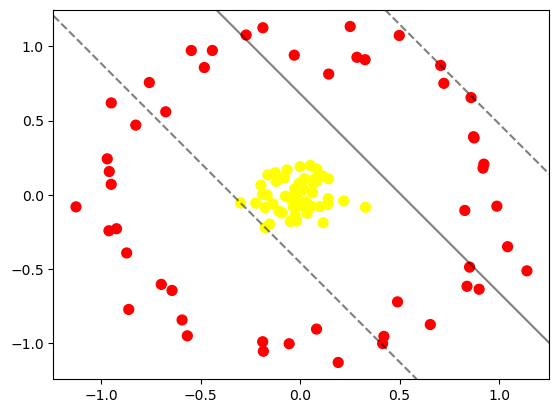

In [9]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [10]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r=np.exp(-(X**2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
        X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.14033988e+00, -5.11916605e-01],
       [ 9.23919589e-01,  2.07093955e-01],
       [-3.44868015e-02, -7.98240184e-02],
       [-1.36914119e-01, -6.10065559e-02],
       [ 3.85700277e-04,  1.90171284e-01],
       [ 8.28122697e-01, -1.05019870e-01],
       [-1.96484430e-01,  6.54697855e-02],
       [ 1.91706050e-01, -1.12942354e+00],
       [ 4.14918663e-01, -1.00164507e+00],
       [-2.71204681e-01,  1.07714484e+00],
       [ 1.04308509e+00, -3.49148201e-01],
       [-8.71642214e-01, -3.91456079e-01],
       [-8.61165282e-01, -7.72000622e-01],
       [-9.69279145e-01,  2.42864059e-01],
       [-8.25782319e-01,  4.70028947e-01],
       [-1.88008641e-01, -9.89787084e-01],
       [ 3.26897895e-01,  9.10742790e-01],
       [-7.57830772e-01,  7.57052554e-01],
       [-7.76850588e-02,  1.16550886e-01],
       [ 9.19612021e-01,  1.80214854e-01],
       [-7.35328918e-02, -8.22603578e-03],
       [ 2.96095971e-02, -4.72013735e-02],
       

### 2 - Fitting Model

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


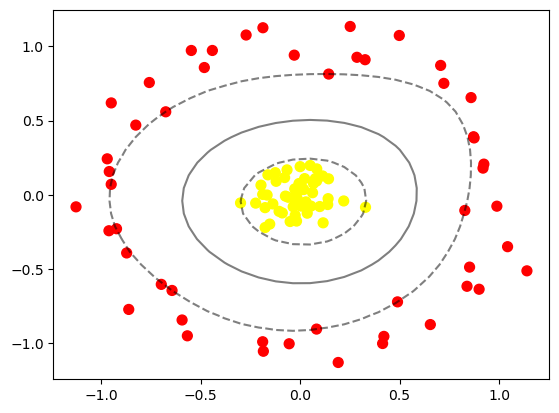

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')